<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/7_intro_to_artificial_neural_networks_and_tensorflow/4_neural_networks_for_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Neural Networks for Classification with TensorFlow

### Contents 

* [1. Intro to Classification with TensorFlow](#1)
* [2. Getting Started: Binary Classification](#2)
   * [2.1 Gathering Data](#2-1)
   * [2.2 Looking in the Data](#2-2)
   * [2.3 Preparing the data for a Model](#2-3)
   * [2.4 Creating, Compiling and Training a Model](#2-4)
   * [2.5 Visualizing the Model Results](#2-5)
   * [2.6 Evaluating the Model](#2-6)
   
* [3. Going Beyond Binary Classifier to Multiclass Classifier: 10 Fashions Classifier](#3)
   * [3.1 Gathering the Data](#3-1)
   * [3.2 Looking in the Data](#3-2)
   * [3.3 Preparing the data for a Model](#3-3)
   * [3.4 Creating, Compiling and Training a Model](#3-4)
   * [3.5 Visualizing the Model Resuts](#3-5)
   * [3.6 Evaluating a Model](#3-6)
   * [3.7 Controlling Training with CallBacks](#3-7)
   * [3.8 Using TensorBoard for Model Visualization](#3-8)
   * [3.9 Final notes](#3-9)

<a name='1'></a>
## Intro to Classification with TensorFlow

Neural networks can also be used for classification problems. In classification, we are mainly predicting the class or categories. 

There are two three types of classification problems: 

* **Binary classification**: For this classification type, we have two classes. Example might be to classify a given tweet as positive or negative depending on its content. 

In binary classification, you only need a single output neuron with a logistic activation function(or sigmoid) that output a number between 0 and 1. A threshold value (by default, 0.5) can be used to differentiate positive and negative classes. Take an example, if the value of the output neuron is 0.7 (which is greater than 0.5), the tweet can be predicted as positive. Else if the the ouput is 0.4(less than 0.5), the predicted class is negative. 

The common loss/cost function used in binary classification is `binary cross entropy`. 


* **Multilabel binary classification**: A good example of this classification type is if you wanted to classify a tweet as sarcastic or not, but also simultaneously predict if its content is techy or not. This is just an example.  
Same as binary classification, the output neurons won't be 1, but it will have a logistic activation function(`sigmoid`). In the example above, the output neurons will be two. One neuron for sarcastic/not, and other for techy/not. While the sum of the probability of positive and negative classes will be 1 in binary classification, in multilabel classification, the outputs won't necessarily add up to 1 because we have more than two neurons. In the given example, the sum of the output neuron's values will be 2. 

The common loss/cost function used in multilabel binary classification is `binary cross entropy`. 

* **Multiclass classification**: For this classification type, we have more than two classes. 

The output neurons are equivalent to the number of classes. Take an example. If we are building a system that can classify 10 different fashions, we will have 10 output neurons activated by the `softmax` function. By using `softmax` function, the output will be a vector whose dimension is equivalent to the number of classes. And one thing I like about softmax, is that instead of getting the probabilities in such output vector, we get an an actual classes (0 or 1). Take an example: if the predicted fashion is a bag, and its position in classes is 3, the output will look like this: [0,0,0,1,0,0,0,0,0,0]. In simple words, the predicted class will be 1, and everything else will be 0. 

The common loss/cost function used in multiclass classification is `categorical cross entropy`. 

In both of those classification types, the number of input neurons, the activation functions in the hidden layers, and the number of hidden layers depend on the problem you're solving. 

Below is a summary of hyerparameter best practices in neural network classifiers.



| **Hyperparameter** | **Binary classifier** | **Multilabel binary classifier** | **Multiclass classifier** |
| --- | --- | --- |--- |
| **Neurons at input layer** | depend on the problem |depend on the problem|depend on the problem
| **No of hidden layer(s)** | depend on problem, usually from 1-10 |Same as ◁|Same as ◁
| **Neurons per hidden layer** | depend on problem, usually 10-100|Same as ◁ |Same as ◁
| **Neurons at output layer** | 1 |Neurons equivalent to number of labels |Neurons equivalent to number of classes
| **Activation in hidden layers**|Mostly Relu or its variants(LeakyReLU, SeLU| Same as ◁ | Same as ◁
| **Activation in output layer** |sigmoid | sigmoid | softmax
| **Loss function** |binary cross entropy |binary cross entropy | categorical cross entropy
| **Optimizer** | Mostly: SGD, Adam, RMSProp|Same as ◁|Same as ◁ Same as ◁|

*Table: Typical values of hyperparameters in neural network classifiers*

There are many hyperparameters in neural networks and finding the best values of each and each can be overwhelming. 

In later notebooks, we will use [Keras Tuner](https://keras.io/keras_tuner/) to search the best hyperparameters whenever possible. It is nearly impossible to assume that a given value of hyperparamater will work well at first. We usually have to experiment with different values. 

Let's put all of the above into practice. 

<a name='2'></a>

## 2. Getting Started: Binary Classifier

We will first practice building neural networks for binary classifier. In binary classification, we have two classes. 

We will use a classical cancer dataset to predict if a given patient has a malignant or benign based on their medical information. We will get it from sklearn datasets. You can read more about the dataset [here](). 

The dataset contains two labels: malignant, benign.

<a name='2-1'></a>

### 2.1 Getting the data

We will get the data from sklearn datasets. 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
# the dataset contain the following features

list(data.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [ ]:
# the dataset contain the following labels

data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# Getting features and labels 

X = data.data
y = data.target

In [ ]:
# the features and labels are numpy array 

type(X)

numpy.ndarray

In [ ]:
# To quickly look in data we can get the dataframe from X

data_df = pd.DataFrame(X, columns=data.feature_names)

<a name='2-2'></a>

## 2.2 Taking a look in the data

In [ ]:
# Looking from the head 

data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Getting the basic information

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Getting the basic stats

data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<a name='2-3'></a>

## 2.3 Preparing the Data

The data from sklearn is reasonably cleaned. Let's split the data into train and test sets, and we will follow with scaling the values to be between 0 and 1. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)

After splitting the data into training and testing sets, let's see the number of examples in each set. 

In [ ]:
print('The number of training samples: {}\nThe number of testing samples: {}'.format(X_train.shape[0], X_test.shape[0]))

The number of training samples: 455
The number of testing samples: 114


In [ ]:
# Scaling the features to be between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

Let's also scale the test set. We do not fit the scaler on the test set. We only transform it. 

In [ ]:
X_test_scaled = scaler.transform(X_test)

We are now ready to create, compile and train the model. 

<a name='2-4'></a>

## 2.4 Creating, Compiling and Training a Model

In TensorFlow, creating a model is only putting together an empty graphs. We are going to use Sequential API to stack the layers, from the input to output. 

In model compilaton, it's where we specify the `optimizer` and `loss` function. Loss function is there for calculating the difference between the predictions and the actual output, and optimizer is there for reducing the loss. 

Also, if we are interested in tracking other metrics during training, we can specify them in `metric`. 

In [ ]:
# Creating a model 

# Getting the input shape

input_shape = X_train_scaled.shape[1:]

model_1 = tf.keras.models.Sequential([
                                      
              # The first layer has 30 neurons(or units)                    
              tf.keras.layers.Dense(units=30, input_shape=input_shape, activation='relu'),

              # The second layer has 25 neurons 

              tf.keras.layers.Dense(units=15, activation='relu'),

              # The third layer has 1 neuron and activation of sigmoid. 
              # Because of sigmoid, the output of this layer will be a value bwteen 0 and 1
              tf.keras.layers.Dense(1, activation='sigmoid')                     
]) 

# Compiling the model 

model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics='accuracy')


After the model is created and compiled, it's time to teach it. It's time to train it on the data. 

In [ ]:
# By setting validation_split=0.15, I am allocating 15% of the dataset to be used for evaluating the model during the training
# Model training returns model history(accuracy, loss, epochs...) 

history = model_1.fit(X_train_scaled, y_train, epochs=60, validation_split=0.15)

Epoch 1/60
13/13 [==============================] - 1s 35ms/step - loss: 0.7219 - accuracy: 0.3705 - val_loss: 0.7088 - val_accuracy: 0.4928
Epoch 2/60
13/13 [==============================] - 0s 5ms/step - loss: 0.7113 - accuracy: 0.4793 - val_loss: 0.7006 - val_accuracy: 0.5362
Epoch 3/60
13/13 [==============================] - 0s 5ms/step - loss: 0.7019 - accuracy: 0.5259 - val_loss: 0.6937 - val_accuracy: 0.5362
Epoch 4/60
13/13 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5855 - val_loss: 0.6871 - val_accuracy: 0.5942
Epoch 5/60
13/13 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.6606 - val_loss: 0.6801 - val_accuracy: 0.7101
Epoch 6/60
13/13 [==============================] - 0s 5ms/step - loss: 0.6798 - accuracy: 0.7202 - val_loss: 0.6735 - val_accuracy: 0.7536
Epoch 7/60
13/13 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.7565 - val_loss: 0.6675 - val_accuracy: 0.7971
Epoch 8/60
13/13 [=

I trained for 60 epochs. That was quick. 

Let's visualize accuracy and loss to actually see how the model did. It is always easy to notice performance on graph than looking on models training progress above. 

‼️ If you retrain again, it will continue where it left. So, for example, if you train for 30 epochs, and you rerun the cell, it will train for same more epochs again.

<a name='2-5'></a>

## 2.5 Visualizing the Results

Visualizing the model results after training is always a good way to learn what you can do to improve the performance. 

Let's get a Pandas dataframe containing training loss and accuracy, and validation loss and accuracy. 

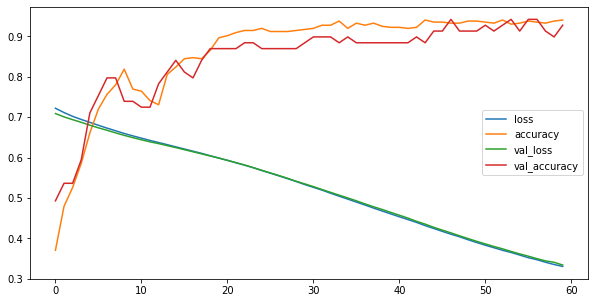

In [ ]:
# Getting the dataframe of loss and accuracies on both training and validation

loss_acc_metrics_df = pd.DataFrame(history.history)
loss_acc_metrics_df.plot(figsize=(10,5))

This is really impressive. Seems that for only 60 epochs, the training accuracy was up to 90% while validation accuracy was 84%. 

This is not bad considering that we have only 455 training samples, and also 15% of such samples are allocated to the validation set. The validation accuracy can be increased by increaing the validation samples. 

Let's evaluate the model on the test set. 

<a name='2-6'></a>

## 2.6 Evaluating the Model

Quite often, you will want to test your model on the data that it never saw. This data is normally called `test set` and in more applied practice, you will only feed the test to the model after you have done your best to improve it. 

Let's now evaluate the model on the test set. One thing to note here is that the test set must be preprocessed the same way we preprocessed the training set. The training set was rescaled (with `MinMaxScaler`) and that was applied to the test set. 

If this is not obeyed, you would not know why you're having poor results. Just look up on the next next cell how poor the accuracy will be if I evaluate the model on unscaled data when I trained it on scaled data. 

In [ ]:
# Evaluating a model on unseen data: test set

model_eval = model_1.evaluate(X_test_scaled, y_test)

# Printing the loss and accuracy 

print('Test loss: {}\nTest accuracy:{}'.format(model_eval[0],model_eval[1]))

4/4 [==============================] - 0s 4ms/step - loss: 0.3146 - accuracy: 0.9298
Test loss: 0.3145657181739807
Test accuracy:0.9298245906829834


In [ ]:
# ‼DON'T DO THIS!! X_test is not scaled. The results will be awful

model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 327.3092 - accuracy: 0.3772


[327.3092346191406, 0.37719297409057617]

It's very suprising how the model did on the test data. It achieved 93%. 

Accuracy is one classification metric, but there are more metrics such as f1 score, recall, and precision. The easiest way to get these metrics is to use `classification_report` function provided by Scikit-Learn. 

Sometime you would also want to know how your model did on the both positive and negative examples.  In this case you can use [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to see the predicted and the actual classes. 

In [ ]:
# Getting the prediction

predictions = model_1.predict(X_test_scaled)

In [ ]:
predictions[:15]

array([[0.68703896],
       [0.19852844],
       [0.37471318],
       [0.78504544],
       [0.8081874 ],
       [0.03121866],
       [0.04509011],
       [0.37985504],
       [0.48416775],
       [0.73546237],
       [0.75935453],
       [0.40290105],
       [0.71097237],
       [0.5158887 ],
       [0.7241085 ]], dtype=float32)

If you look at the predictions above, they are probabilities (value between 0 and 1). 

And this make sense because our model is returning the values between 0 and 1 because of the [`sigmoid activation function or logistic function`](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid) at the output layer. 

In order to find the metrics we noted above, we have to round the predictions to either 0 or 1. For this, we can use [`np.round()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.round.html#numpy.ndarray.round) or [`tf.math.round()`](https://www.tensorflow.org/api_docs/python/tf/math/round). 

Round function will return the closest integer. For example, for a prediction of 0.3, it will be 0. If the prediction is 0.6, the closest integer is 1. 

In [ ]:
# Rounding the predictions to 0 and 1

predictions = tf.round(predictions)

In [ ]:
 # Display the first 15 preds values 
 
predictions[:15]

<tf.Tensor: shape=(15, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

Great, the predictions are now rounded up to either 0 or 1. 

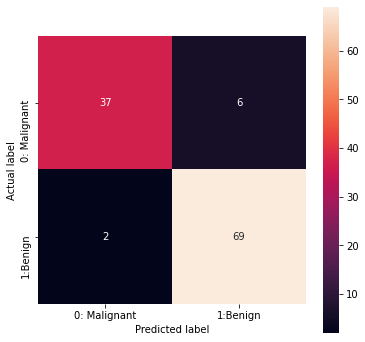

In [ ]:
# Getting the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

# Plotting confusion matrix 

plt.figure(figsize=(6,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0: Malignant', '1:Benign'],
                        yticklabels=['0: Malignant', '1:Benign'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

Let's interpret the confusion matrix:

First off, the rows represent the actual classes and the columns represent the predicted classes. 

With that said:

* *36 Malignant samples were correctly classified as Malignant. Also called True Positives*
* *7 Malignant samples were incorrectly classified as Benign.  Also called False Positives*
* *0 Benign samples were incorrectly classified as Malignant.  Also called False Negatives*
* 71 *Benign samples were correctly classified as Benign.  Also called True Negatives*


In [ ]:
# Classification report: F1 score, Recall, Precision

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



Here are notes about these metrics:

* **Accuracy** is the ratio of the correct predicted samples over the total samples.
* **Precision** is the ratio of correct predicted positive samples over the total positive predictions.
* **Recall** is the ration of correct predicted positive samples over total positive samples.

* **F1 score** is the harmonic mean of precision and recall.

These metrics can be confusing. To learn more about them, here is a [great writeup by Santiago.](http://digest.underfitted.io/issues/cutting-costs-634137). 

<a name='3'></a>

## Going Beyond Binary Classifier to Multiclass Classifier: 10 Fashions Classifier

So far, we have built a neural network for regression(in previous labs) and binary classification. And we have only been working with structured datasets(datasets in tabular format). 

Can the same neural networks we used be able to recognize images? In this next practice, we will turn the page to image classification. We will build a neural network for recognizing 10 different fashions and along the way, we will learn other things such as stopping the training upon a given condition is met, and using TensorBoard to visualize model. 

That is going to be cool! Let's get started! 

<a name='3-1'></a>

## 3.1 Getting the Fashion data

Fashion MNIST data is made of 70.000 fashions, 60.000 of them are allocated for training set and 10.000 for test set. Each image is 28*28, grayscale. 


!['Fashion Dataset'](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)


!['Embedding: Fashion Dataset'](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif)

The fashions are of 10 categories. Below are their labels: 


| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Image & gif of fashions shown above are taken from [dataset homepage](https://github.com/zalandoresearch/fashion-mnist)

Let's get the dataset from Keras.

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(fashion_train, fashion_train_label), (fashion_test, fashion_test_label) = fashion_mnist.load_data()

<a name='3-2'></a>

## Looking in the Fashion Data

As always, it is a best practice to peep into the images to see how they like. 

Let's display the pixels values of a given image, image, and its corresponding label. 

In [ ]:
index = 10

# Get the pixels

fashion_train[index]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [ ]:
# A list of label names

class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

This type of fashion is: T-shirt/top(0)


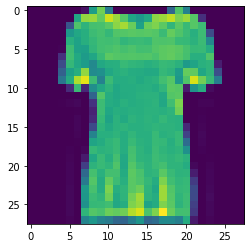

In [ ]:
# Show the image

plt.imshow(fashion_train[index])

# Display the label

image_label = fashion_train_label[index]
print('This type of fashion is: {}({})'.format(class_names[image_label], image_label))

The fashions with the label 0 is `T-shirt/top`. Normally, the pixels of image range from 0 to 255. If you can look back where we displayed the pixels, you will see that they vary from 0 to 255. 

We can also visualize some random images. 

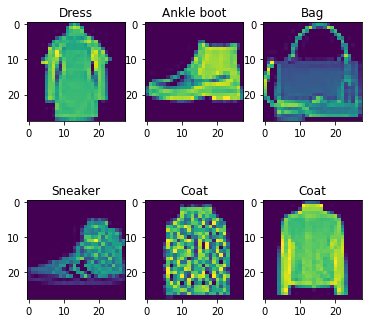

In [ ]:
import random

plt.figure(figsize=(6,6))

for index in range(6):

  ax = plt.subplot(2,3, index+1)
  random_index = random.choice(range(len(fashion_train)))
  plt.imshow(fashion_train[random_index])
  plt.title(class_names[fashion_train_label[random_index]])

You can rerun the above cell to display different fashions. 

Another important thing to look at when working with images is to see their size. 

This is important because later when we will be creating a model, we have to specify the input shape and such shape is same as the shape of the images. Each image is 28*28, but let's verify that. 

In [ ]:
# Getting the image shape

print('The shape of the whole training dataset:{}'.format(fashion_train[0].shape))
print('The shape of the first(and other)image:{}'.format(fashion_train[0].shape))

The shape of the whole training dataset:(28, 28)
The shape of the first(and other)image:(28, 28)


Now that we know the dataset that we are working with, let us do some few proprocessing before building a model. 

<a name='3-3'></a>

## 3.3 Preparing the Data

In many cases, real world images datasets are not that clean like fashion mnist. 

You may have to correct images that were incorrectly labeled, or you have labels in texts that need to be converted to numbers(most machine learning models accept numeric input), or scale the pixels values. 

The latter is what we are going to do. It is inarguable that scaling the images pixels to value between 0 and 1 increase the performance of the neural network, and hence the results. Let's do it!! 

As we have seen, the pixels range from 0 to 255. So we will divide both training and test set by 255.0. 

In [ ]:
# Scaling the image pixels to be between 0 and 1

fashion_train = fashion_train/255.0

fashion_test = fashion_test/255.0

We are now ready to build a neural network. 

<a name='3-4'></a>

## 3.4 Creating, Compiling, and Training a Model

There are few points to note before creating a model:

* When working with images, the shape of the input images has to be correctly provided. This is a common error done by many people, including me (before I learned it). 

* This is a multiclass classification, which is different to the binary classifier we did earlier. The difference will be reflected in the choice of output activation function, number of output neurons, and the loss function. 

* That said, we will use `softmax` as activation in the last layer, 10 neurons or units because we have 10 fashions, and the loss will be  `SparseCategoricalCrossentropy` because the labels are pure integer. If the labels were in one hot format, we would use `CategoricalCrossentropy`. Learn more about Keras losses [here](https://keras.io/api/losses/probabilistic_losses/). 

Documentation is always the top source when learning all the possibilities of any framework. And also, Keras doc is beautifuly organized. Not to mention that the keras API is also well designed as well. 

Let's now create a model. 

In [ ]:
# Creating a model

fashion_classifier = tf.keras.models.Sequential([
                                                 
        # Flattening layer will convert array of pixels into one dimensional column array                                        
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=64, activation='relu'),
       tf.keras.layers.Dense(units=32, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax')                           

])

# Compiling a model: Specifying a loss and optimization function

fashion_classifier.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy']
                           
)

Now that we built and compiled a model, we can train it. 

In order to train a model, we must have an input data and output(labels). We train the model to get the relationship between the input and output. Such relationship is what we tend to call rules. So, in other words, we provide the data and the answers to a model to get the rules. 

In [ ]:
# Training a model
# Allocating 15% of training data to validation set

fashion_classifier.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5368 - accuracy: 0.8105 - val_loss: 0.4270 - val_accuracy: 0.8456
Epoch 2/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3994 - accuracy: 0.8576 - val_loss: 0.3924 - val_accuracy: 0.8610
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.8678 - val_loss: 0.3694 - val_accuracy: 0.8654
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3387 - accuracy: 0.8765 - val_loss: 0.3942 - val_accuracy: 0.8583
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3190 - accuracy: 0.8827 - val_loss: 0.3612 - val_accuracy: 0.8720
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3068 - accuracy: 0.8861 - val_loss: 0.3365 - val_accuracy: 0.8770
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2916 - accuracy: 0.8922 - val_loss: 0.3551 - val_accuracy:

This was fast. When using Google Colab, you can speed up the training by changing the `runtime type`to `GPU`. You can head over `Runtime` in the `menu bar`>> Click on `Change runtime type`>>Choose `GPU`. 

But also, training mnist for 20 epochs is not slow that we would need to activate GPU. We will take an advantage of GPU in later labs. 

<a name='3-5'></a>

## 3.5 Visualizing the Model Results

Let's visualize the model results to see how training went. 

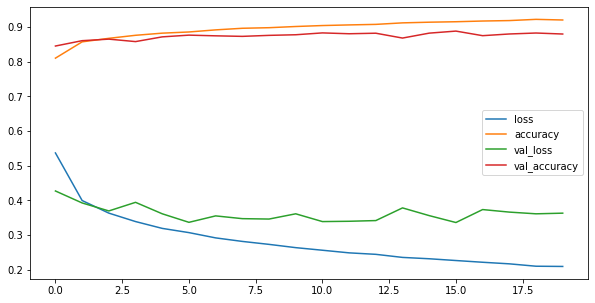

In [ ]:
# Getting the dataframe of loss and accuracies on both training and validation

loss_acc_metrics_df = pd.DataFrame(fashion_classifier.history.history)

# Plotting the loss and accuracy

loss_acc_metrics_df.plot(figsize=(10,5))

At the end of the training, the accuracy is about 92% while validation accuracy being 88% or so. That's not bad considering that we built a simple model and trained for only 20 epochs. 

Let's see how the model performs on unseed data: test set. 

<a name='3-6'></a>

## 3.6 Model Evaluation

In [ ]:
# Evaluating the model on unseen data

eval = fashion_classifier.evaluate(fashion_test, fashion_test_label)

# Printing the loss and accuracy 

print('Test loss: {}\nTest accuracy:{}'.format(eval[0],eval[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3724 - accuracy: 0.8799
Test loss: 0.3724398612976074
Test accuracy:0.8798999786376953


The fashion classifier that we built is 88% confident at recognizing unseen fashion. 

We could also find other Classification metrics based on True/False positives & negatives such as precision, recall, but since we already saw how to compute them in the binary classifier, let's see other interesting things: Controlling the training using [callbacks](https://keras.io/api/callbacks/) and using [TensorBoard](https://www.tensorflow.org/tensorboard). 


<a name='3-7'></a>

## 3.7 Controlling Training with Callbacks

We can use Callbacks functions to control the training. 

Take an example: we can stop training when the model is lo longer showing significant improvements on validation set. Or we can terminate training when a certain condition is met. 

### Implementing Callbacks

There are various functionalities available in Keras Callbacks. 

Let's start with how to use `ModelCheckpoint` to save the model when the performance on the validation set is best so far. By saving the best model on the validation set, we avoid things like overfitting which is a common issue in machine learning model training, neural network specifically. We also train for less time. 

I will rebuild a same model again. 

In [ ]:
# Creating a same model as used before

def classifier():

  model = tf.keras.models.Sequential([
                                                 
        # Flattening layer will convert array of pixels into one dimensional column array                                        
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=64, activation='relu'),
       tf.keras.layers.Dense(units=32, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax')                           

  ])

# Compiling a model: Specifying a loss and optimization function

  model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy']
                           
  )

  return model

In [ ]:
# Defining callbacks 

from keras.callbacks import ModelCheckpoint

callbacks = ModelCheckpoint('fashion_classifier.h5', save_best_only=True)

The `callbacks` defined above is passed into the model fit. 

In [ ]:
# Controlling training with callbacks

# Get the model

fashion_classifier_2 = classifier()

fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15, callbacks=[callbacks])

Epoch 1/20
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5474 - accuracy: 0.8101 - val_loss: 0.4271 - val_accuracy: 0.8476
Epoch 2/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4015 - accuracy: 0.8573 - val_loss: 0.4191 - val_accuracy: 0.8470
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3643 - accuracy: 0.8689 - val_loss: 0.3805 - val_accuracy: 0.8650
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3396 - accuracy: 0.8761 - val_loss: 0.3639 - val_accuracy: 0.8667
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3177 - accuracy: 0.8834 - val_loss: 0.3656 - val_accuracy: 0.8678
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3048 - accuracy: 0.8870 - val_loss: 0.3419 - val_accuracy: 0.8746
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2910 - accuracy: 0.8931 - val_loss: 0.3551 - val_accuracy:

If you look below, the model was saved and the version that is saved will be the best model on the validation set. 

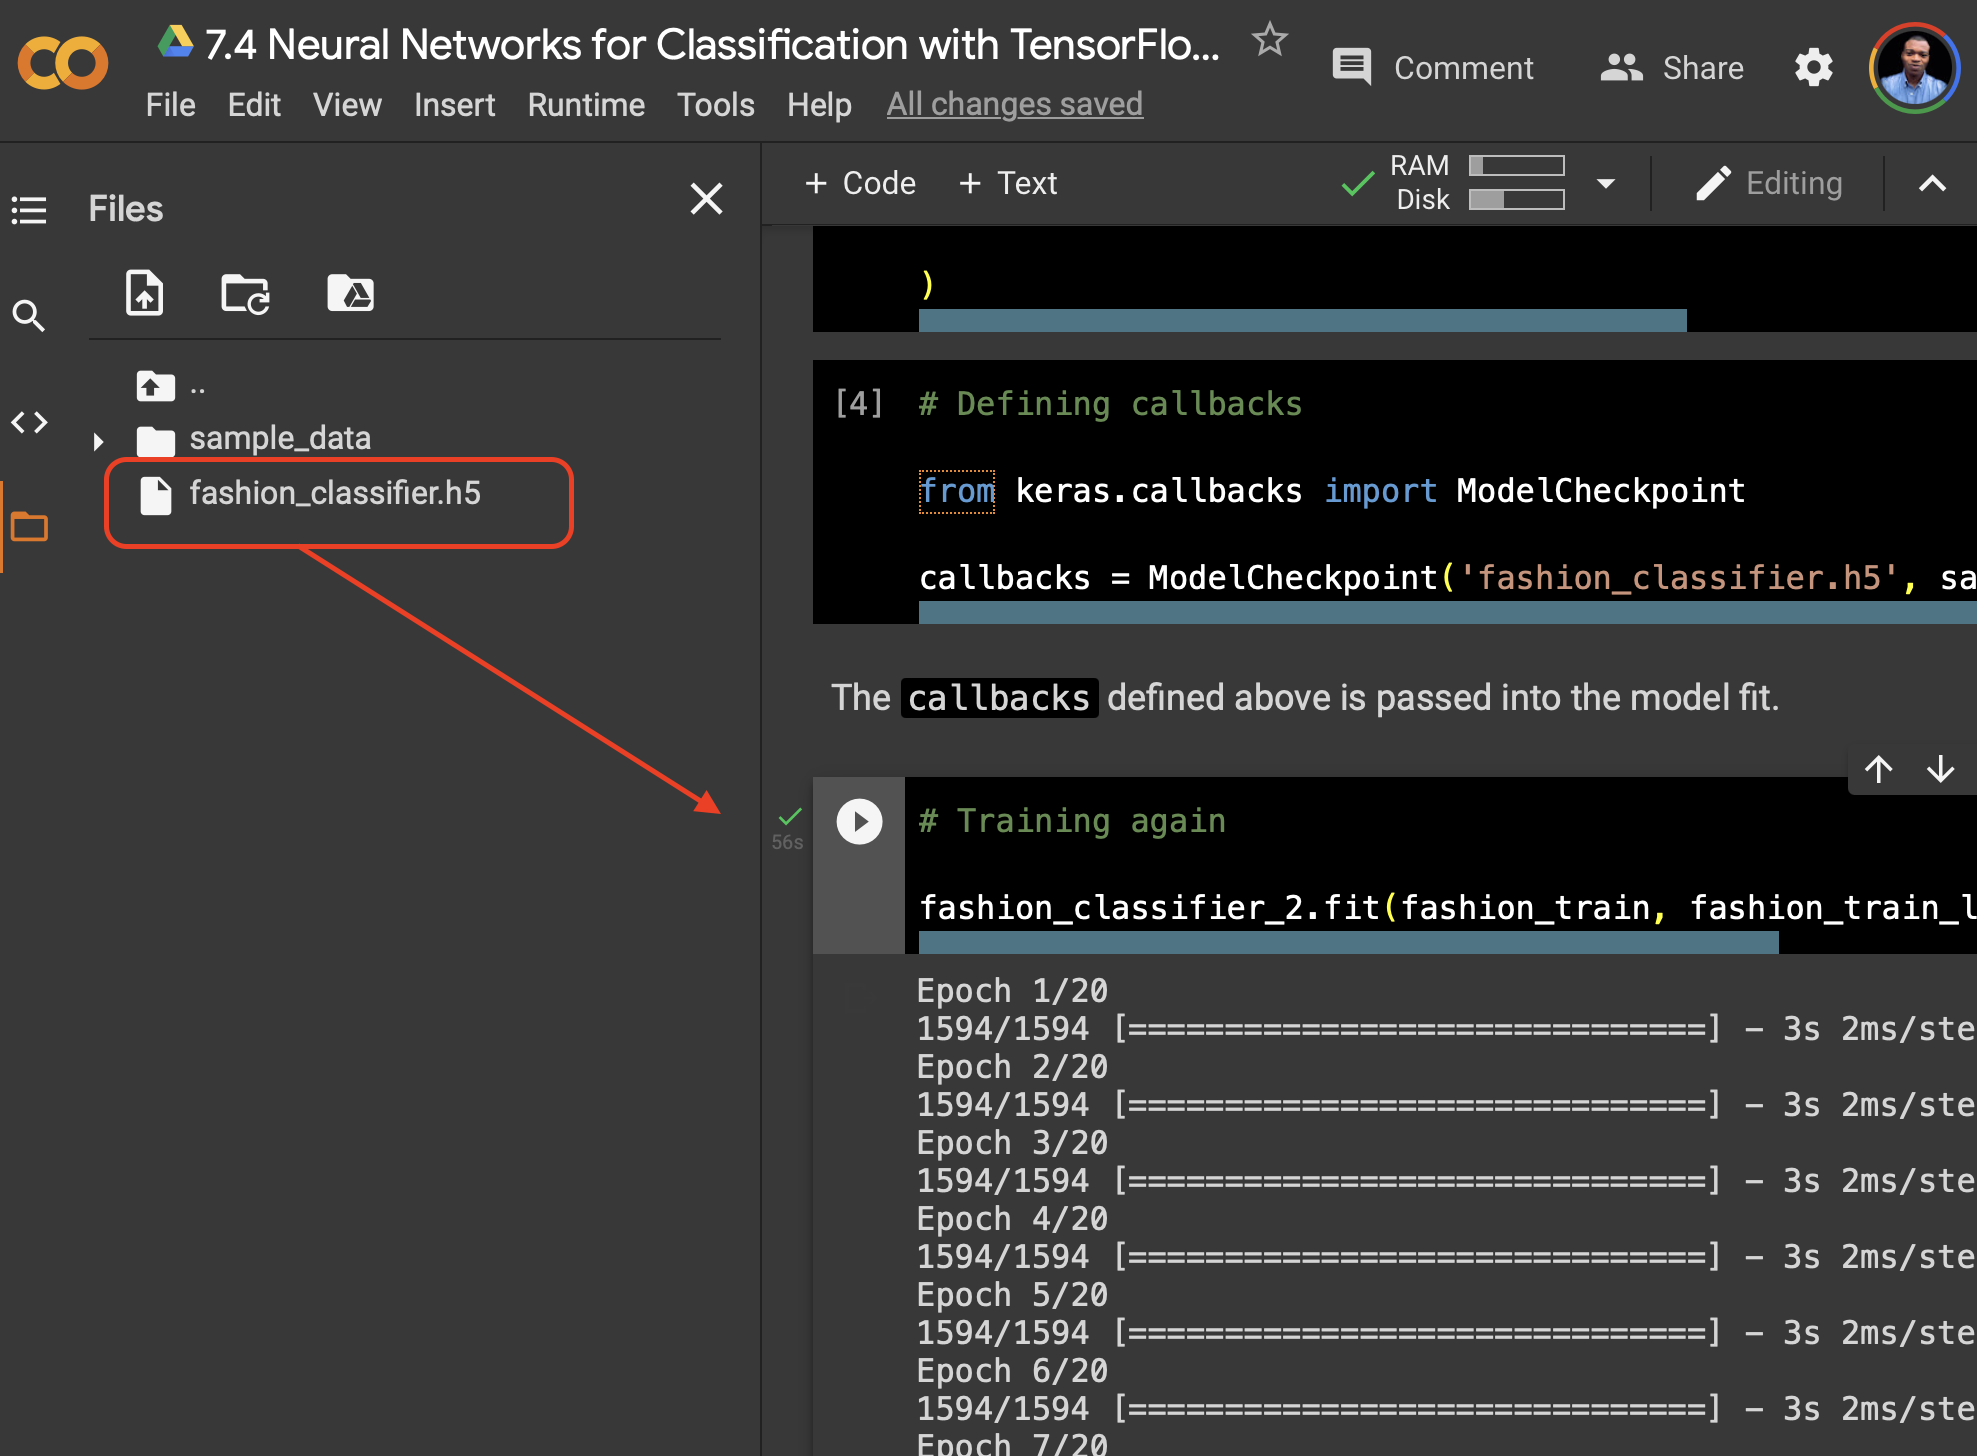

Another easier way to control the model training is to use [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/). 

By using early stopping, the training will be stopped when a monitored metric is no longer improving for a given number of consecutive epochs. 

The metric to be monitored during the training is `val_accuracy` in our example, and it is assigned to `monitor` argument. The `patience` represent the number of consecutive epochs of which the training will stop when there is no significant improvements in `val_accuracy`. 

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

Let's train for 100 epochs to be able to notice if the training stops as soon as there is no improvements in the validation set for 4 epochs in row. 

In [ ]:
# Stopping training early

# Getting the model

fashion_classifier_2 = classifier()

history = fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=100, validation_split=0.15, callbacks=[early_stop])

Epoch 1/100
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5298 - accuracy: 0.8124 - val_loss: 0.4781 - val_accuracy: 0.8349
Epoch 2/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3938 - accuracy: 0.8577 - val_loss: 0.3845 - val_accuracy: 0.8653
Epoch 3/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3545 - accuracy: 0.8701 - val_loss: 0.3672 - val_accuracy: 0.8672
Epoch 4/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3294 - accuracy: 0.8788 - val_loss: 0.3474 - val_accuracy: 0.8734
Epoch 5/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3124 - accuracy: 0.8864 - val_loss: 0.3533 - val_accuracy: 0.8702
Epoch 6/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.8904 - val_loss: 0.3438 - val_accuracy: 0.8770
Epoch 7/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2847 - accuracy: 0.8945 - val_loss: 0.3271 - val_ac

The training stopped at the epoch of 12, with the accuracy of 88.33%. On epoch 8, the accuracy was 88.48, it is very clear that from the epoch 8 to 12, there was no improvement, and thus the training stopped. 

Early stopping can potentially save our time and resources. 

One last thing before going to custom callbacks, we can combine both `ModelCheckpoint`(for saving the best model on validation set on the course of training) and `EarlyStopping` for saving us time. 

In [ ]:
# Combining Early stopping and Model Check point

# Getting the model 

fashion_classifier_2 = classifier()

history = fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=100, validation_split=0.15, callbacks=[callbacks, early_stop])

Epoch 1/100
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5287 - accuracy: 0.8138 - val_loss: 0.4567 - val_accuracy: 0.8323
Epoch 2/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3910 - accuracy: 0.8588 - val_loss: 0.3919 - val_accuracy: 0.8586
Epoch 3/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3532 - accuracy: 0.8701 - val_loss: 0.3811 - val_accuracy: 0.8614
Epoch 4/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3329 - accuracy: 0.8783 - val_loss: 0.3745 - val_accuracy: 0.8633
Epoch 5/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3132 - accuracy: 0.8853 - val_loss: 0.3593 - val_accuracy: 0.8720
Epoch 6/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3026 - accuracy: 0.8882 - val_loss: 0.3393 - val_accuracy: 0.8771
Epoch 7/100
1594/1594 [==============================] - 6s 3ms/step - loss: 0.2864 - accuracy: 0.8947 - val_loss: 0.3387 - val_ac

### Custom Callback



Keras offers various functions for implementing custom callbacks that are very handy when you want to control the model training with a little bit of customization. 

You can do certain actions on almost every step of the training. Let's stop the training when the accuracy is 95%. 

In [ ]:
# Custom callbacks

class callback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if (logs.get('accuracy') > 0.95):

      print('\n Training is cancelled at an accuracy of 95%')
      self.model.stop_training = True


# Call callbacks

custom_callback = callback()

In [ ]:
# Implementing custom ballback

# Getting the model 

fashion_classifier_2 = classifier()

history = fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=100, validation_split=0.15, callbacks=[custom_callback])

Epoch 1/100
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5393 - accuracy: 0.8095 - val_loss: 0.4304 - val_accuracy: 0.8489
Epoch 2/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3875 - accuracy: 0.8606 - val_loss: 0.4043 - val_accuracy: 0.8553
Epoch 3/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3518 - accuracy: 0.8713 - val_loss: 0.3831 - val_accuracy: 0.8613
Epoch 4/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3307 - accuracy: 0.8785 - val_loss: 0.3949 - val_accuracy: 0.8592
Epoch 5/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3134 - accuracy: 0.8834 - val_loss: 0.3427 - val_accuracy: 0.8756
Epoch 6/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2982 - accuracy: 0.8904 - val_loss: 0.3421 - val_accuracy: 0.8746
Epoch 7/100
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2865 - accuracy: 0.8937 - val_loss: 0.3488 - val_ac

Perfect! The training stopped as soon as the training accuracy reached 95% and the specified message was printed. 

There are many customizations available in [Keras custom callbacks](https://keras.io/guides/writing_your_own_callbacks/). Be sure to check that out.

<a name='3-8'></a>

## 3.8 Using TensorBoard for Model Visualization

[Tensorboard](https://www.tensorflow.org/tensorboard/) is incredible tool used by many people (and not just only TensorFlow developers) to experiment with machine learning. 

With TensorBoard, you can:

* Track and visualize the loss and accuracy
* Visualize the model graphs and operations
* Display images and other types of data
* View the histograms of weights and biases.

We first have to load the TensorBoard extension as follows.

In [ ]:
# Load the Tensorboard notebook extension
# And import datetime

%load_ext tensorboard

And we clear all logs from all runs we did before.

In [ ]:
!rm -rf ./logs/

Le's get the model from the function `classifier` defined in previous cells. 

In [ ]:
# Getting the model 

fashion_classifier = classifier()

Let's create a Keras callback.

In [ ]:
# Create a callback

tfboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

Now, train the model and provide the `tfboard_callback` to `callback` argument.

In [ ]:
fashion_classifier.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15, callbacks=[tfboard_callback])

Epoch 1/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.5468 - accuracy: 0.8092 - val_loss: 0.4526 - val_accuracy: 0.8351
Epoch 2/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3985 - accuracy: 0.8584 - val_loss: 0.3857 - val_accuracy: 0.8616
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3600 - accuracy: 0.8689 - val_loss: 0.3876 - val_accuracy: 0.8622
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3338 - accuracy: 0.8776 - val_loss: 0.3388 - val_accuracy: 0.8774
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3169 - accuracy: 0.8836 - val_loss: 0.3621 - val_accuracy: 0.8713
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3049 - accuracy: 0.8876 - val_loss: 0.3392 - val_accuracy: 0.8787
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2918 - accuracy: 0.8925 - val_loss: 0.3668 - val_accuracy:

Now that the training is over, we can start the TensorBoard. 

In [ ]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

As you can see, TensorBoard is very useful. The fact that you can use it to visualize the performance metrics, model graphs, and datasets as well. 

<a name='3-9'></a>

## 3.9 Final Notes
This is the end of the notebook!

We have learned how to build neural networks for binary classification, multiclass classification, saw how to control the taining with callbacks, and how to use TensorBoard for visualizing model, metrics, and parameters. 

[BACK TO TOP](#0)